In [204]:
using PyPlot
using ControlSystems

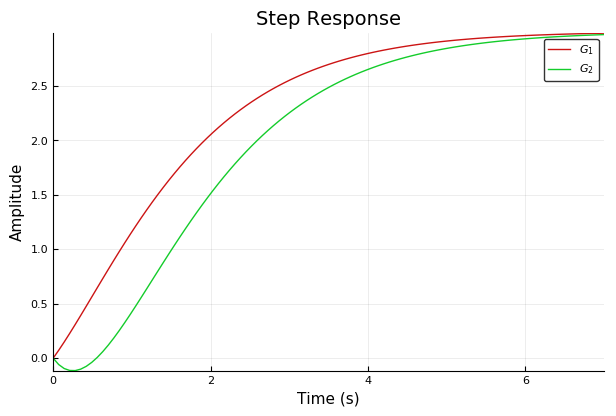

In [205]:
# Simple Tracking Problem

# Control of 2 different transfer functions 

# Setup laplace variable
s = tf("s");

G1 = (3+s)/(s^2 + 2*s + 1);
G2 = (3-s)/(s^2 + 2*s + 1);

systems = [G1,G2];

# Step Plots of each system
stepplot(systems);
hold(true)
Plots.savefig("Tracking_Plots/step_plots.svg")





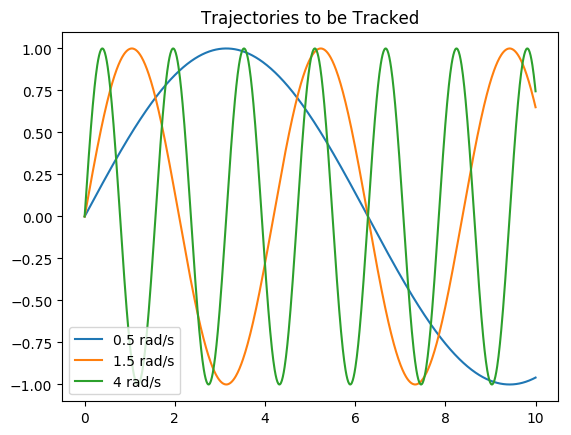

In [206]:
# Trajectories to be tracked
t = linspace(0,10,1000);
w = [0.5, 1.5, 4]; # rad/s 
y_d = [sin.(w_i*t) for w_i in w];
hold(true);
tr1 = plot(t, y_d[1], label="0.5 rad/s");

tr2 = plot(t, y_d[2], label="1.5 rad/s");
tr3 = plot(t, y_d[3], label="4 rad/s");
hold(false)
title("Trajectories to be Tracked");
legend();

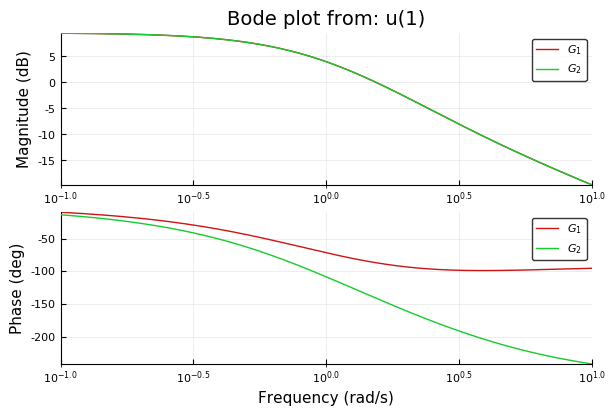

In [207]:
# Bode Plots of each system

bodeplot(systems);
hold(true)
Plots.savefig("Tracking_Plots/Bode_plots.svg")

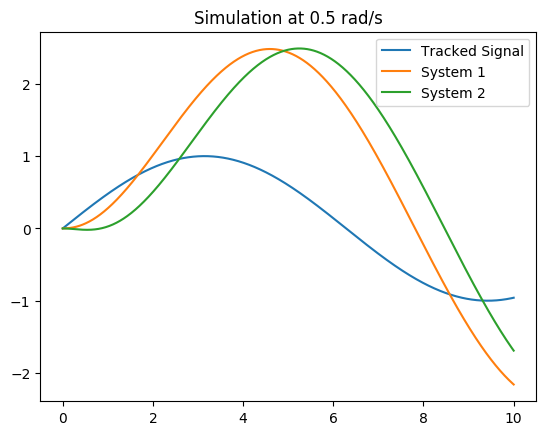

In [208]:
# Current Performance of each system
# 0.5 rad/s
y_sim1, _ = lsim(G1, y_d[1], t);
y_sim2, _ = lsim(G2, y_d[1], t);

size(y_sim2)
hold(true);
plot(t,y_d[1], label="Tracked Signal");
plot(t,y_sim1, label="System 1");
plot(t,y_sim2, label="System 2");
hold(false);

title("Simulation at 0.5 rad/s");
legend()

Plots.savefig("Tracking_Plots/simulation_05rads.svg")

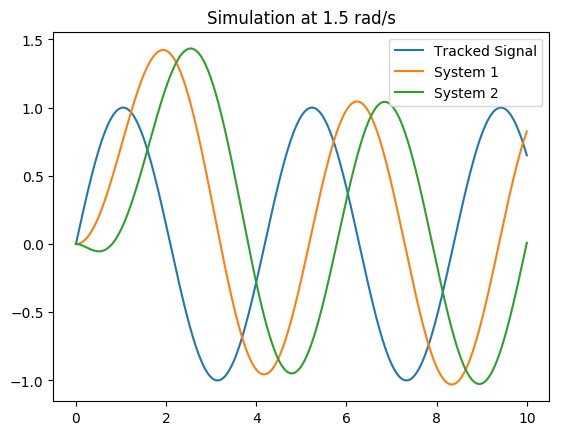

In [209]:
# 1.5 rad/s
y_sim1, _ = lsim(G1, y_d[2], t);
y_sim2, _ = lsim(G2, y_d[2], t);

size(y_sim2)
hold(true);
plot(t,y_d[2], label="Tracked Signal");
plot(t,y_sim1, label="System 1");
plot(t,y_sim2, label="System 2");
hold(false);

title("Simulation at 1.5 rad/s");
legend()

Plots.savefig("Tracking_Plots/simulation_15rads.svg")

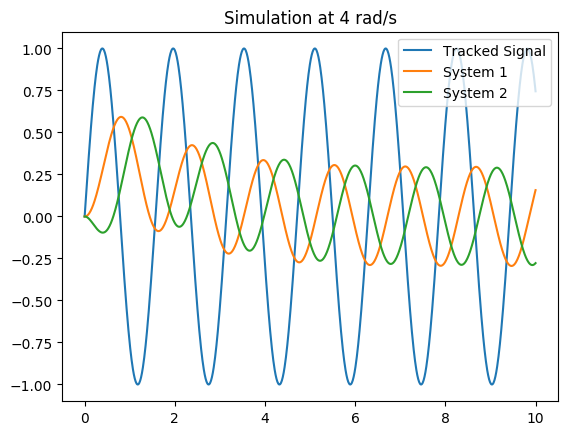

In [210]:
# 4 rad/s
y_sim1, _ = lsim(G1, y_d[3], t);
y_sim2, _ = lsim(G2, y_d[3], t);

size(y_sim2)
hold(true);
plot(t,y_d[3], label="Tracked Signal");
plot(t,y_sim1, label="System 1");
plot(t,y_sim2, label="System 2");
hold(false);

title("Simulation at 4 rad/s");
legend()

Plots.savefig("Tracking_Plots/simulation_4rads.svg")


In [211]:
# Design a lead compensator for G1 and apply to G2 to see results
# Of the form: G(s) = K*(ατs + 1)/(τs + 1)
#     α = lead ratio between pole and zero
#     τ = pole of controller

# Helper functions
db(x) = 20*log10(x);
ϕ_to_α(ϕ_m) = (1 + sin(ϕ_m))/(1 - sin(ϕ_m));
τ_from_wc(wc, α)   = 1/(wc*sqrt(α));
K_cross(C,P,wc) = 1./abs.(evalfr(C,wc*1im)*evalfr(P,wc*1im));




In [212]:
# Design for first system
# Try π/3 rad phase and wc = 4 rad/s
ϕ_m = pi/3;
wc  = 4;

a1 = ϕ_to_α(ϕ_m);
t1 = τ_from_wc(wc, a1);

println("α = ", a1);
println("τ = ", t1);

# Non-gained controller values
C1 = (a1*t1*s + 1)/(t1*s + 1);

println("Ungained controller: \n", C1);

# Calculate Gain
K1 = K_cross(C1,G1,wc);
println("K = ", K1);

# Full Controller
C1 = K1[1]*C1;

α = 13.928203230275503
τ = 0.06698729810778069
Ungained controller: 
TransferFunction:
0.9330127018922191s + 1.0
--------------------------
0.06698729810778069s + 1.0

Continuous-time transfer function model
K = [0.911027]


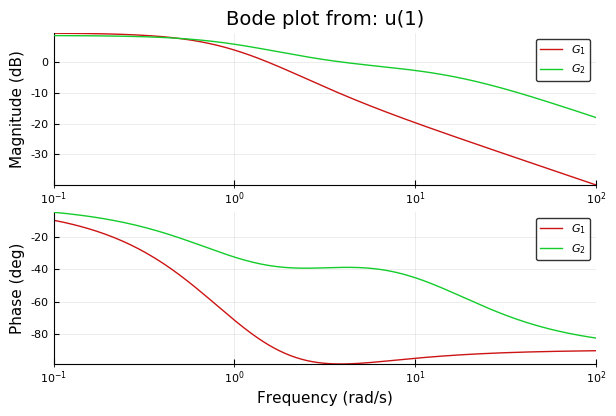

In [213]:
# Bode Plot of old and compensated system

bodeplot([G1, G1*C1]);
hold(true);

Plots.savefig("Tracking_Plots/compensated_G1.svg");

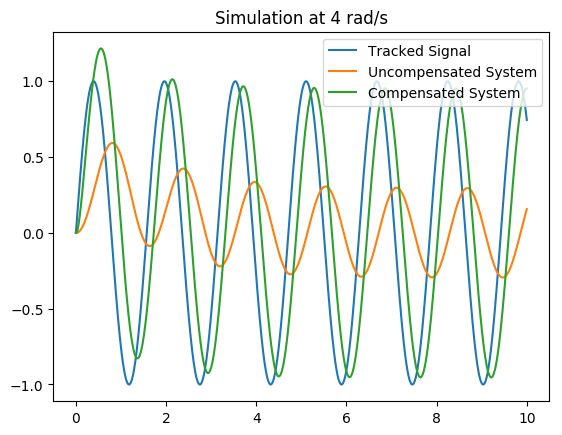

In [214]:
# 4 rad/s
y_sim1, _ = lsim(G1, y_d[3], t);
y_sim2, _ = lsim(G1*C1, y_d[3], t);

size(y_sim2)
hold(true);
plot(t,y_d[3], label="Tracked Signal");
plot(t,y_sim1, label="Uncompensated System");
plot(t,y_sim2, label="Compensated System");
hold(false);

title("Simulation at 4 rad/s");
legend()

Plots.savefig("Tracking_Plots/compensated_4rads.svg")

# We see that pretty good performance is achieved at the 4 rad/s max bandwidth we specified.
# Further analysis can be done to improve the overall performance within the band and get it to
# track as closely as possible. 

In [217]:
# Compensation for second system
# Try π/3 rad phase and wc = 4 rad/s
ϕ_m = 60*(pi/180);
wc  = 4;

a1 = ϕ_to_α(ϕ_m);
t1 = τ_from_wc(wc, a1);

println("α = ", a1);
println("τ = ", t1);

# Non-gained controller values
C2 = (a1*t1*s + 1)/(t1*s + 1);

println("Ungained controller: \n", C2);

# Calculate Gain
K1 = K_cross(C2,G2,wc);
println("K = ", K1[1]);

# Full Controller
C1 = K1[1]*C2;

α = 13.928203230275503
τ = 0.06698729810778069
Ungained controller: 
TransferFunction:
0.9330127018922191s + 1.0
--------------------------
0.06698729810778069s + 1.0

Continuous-time transfer function model
K = 0.9110272542658174


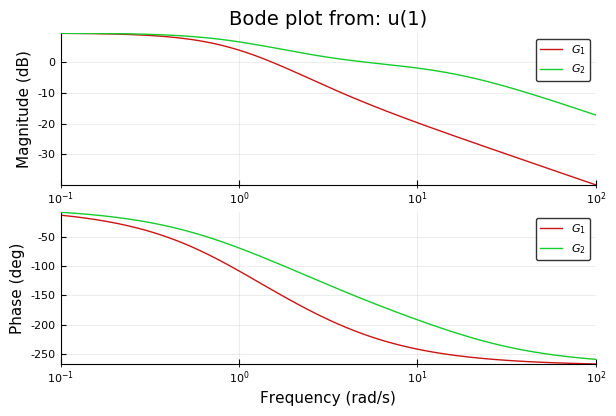

In [218]:
# Bode Plot of old and compensated system

bodeplot([G2, G2*C2]);
hold(true);

Plots.savefig("Tracking_Plots/compensated_G2.svg");

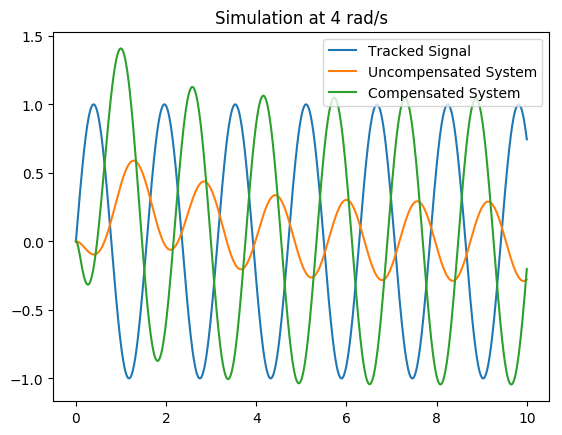

In [219]:
# 4 rad/s
y_sim1, _ = lsim(G2, y_d[3], t);
y_sim2, _ = lsim(G2*C2, y_d[3], t);

size(y_sim2)
hold(true);
plot(t,y_d[3], label="Tracked Signal");
plot(t,y_sim1, label="Uncompensated System");
plot(t,y_sim2, label="Compensated System");
hold(false);

title("Simulation at 4 rad/s");
legend()

Plots.savefig("Tracking_Plots/compensated2_4rads.svg")


# We see that there are a lot of issues in stabilizing the second system 
# Trying different values of the phase margin, trying to track signals past the 3 rad/s
# unstable zero is very difficult, and actually a fundamental limitation of this system.